In [1]:
import pandapower as pp
import pandas as pd
import numpy as np
import os
import pandapower.networks as pn
import random
# create empty net
net = pp.create_empty_network()
Sb = 10 #基准容量 10MVA
Zb = 12.66 ** 2 / Sb #基准阻抗

In [2]:
net=pp.create_empty_network()
#Bus1=pp.create_bus(net, name='Busbar1', vn_kv=10, type='b')
#Bus2=pp.create_bus(net, name='Busbar2', vn_kv=10, type='b')
#Bus3=pp.create_bus(net, name='Busbar5', vn_kv=10, type='b')
for i in range (33):
    pp.create_bus(net, name='bus%s' % i, vn_kv=10, type='n')
        

        

In [3]:
net.bus

,name,vn_kv,type,zone,in_service
0,bus0,10.0,n,None,True
1,bus1,10.0,n,None,True
2,bus2,10.0,n,None,True
3,bus3,10.0,n,None,True
4,bus4,10.0,n,None,True
5,bus5,10.0,n,None,True
6,bus6,10.0,n,None,True
7,bus7,10.0,n,None,True
8,bus8,10.0,n,None,True
9,bus9,10.0,n,None,True


In [4]:
# 获取 bus8 的信息
bus8= net.bus.index[8]
bus14= net.bus.index[14]
bus11= net.bus.index[11]
bus21= net.bus.index[21]
bus7= net.bus.index[7]
bus20= net.bus.index[20]
bus24= net.bus.index[24]
bus28= net.bus.index[28]
bus17= net.bus.index[17]
bus32= net.bus.index[32]
bus0= net.bus.index[0]
# 打印 bus8 的信息


In [5]:

#switch
sw1 = pp.create_switch(net, bus8, bus14, et="b", type="CB", closed=True)
sw2 = pp.create_switch(net, bus11, bus21, et="b", type="CB", closed=True)
sw3 = pp.create_switch(net, bus7, bus20, et="b", type="CB", closed=True)
sw4 = pp.create_switch(net, bus24, bus28, et="b", type="CB", closed=True)
sw5 = pp.create_switch(net, bus17, bus32, et="b", type="CB", closed=True)


In [6]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type


In [7]:
#节点负载信息
loads = [
    (0, 3.755, 2.5),  # 节点0
    (1, 0.1, 0.06),   # 节点1
    (2, 0.09, 0.04),  # 节点2
    (3, 0.12, 0.08),  # 节点3
    (4, 0.06, 0.03),  # 节点4
    (5, 0.06, 0.02),  # 节点5
    (6, 0.2, 0.1),    # 节点6
    (7, 0.2, 0.1),    # 节点7
    (8, 0.06, 0.02),   # 节点8
    (9, 0.06, 0.02),   # 节点9
    (10, 0.045, 0.03), # 节点10
    (11, 0.06, 0.035), # 节点11
    (12, 0.06, 0.035), # 节点12
    (13, 0.12, 0.08),  # 节点13
    (14, 0.1, 0.1),    # 节点14
    (15, 0.06, 0.02),   # 节点15
    (16, 0.06, 0.02),   # 节点16
    (17, 0.09, 0.04),   # 节点17
    (18, 0.09, 0.04),   # 节点18
    (19, 0.09, 0.04),   # 节点19
    (20, 0.09, 0.04),   # 节点20
    (21, 0.09, 0.04),   # 节点21
    (22, 0.09, 0.05),   # 节点22
    (23, 0.42, 0.2),    # 节点23
    (24, 0.42, 0.2),    # 节点24
    (25, 0.06, 0.025),   # 节点25
    (26, 0.06, 0.025),   # 节点26
    (27, 0.06, 0.02),    # 节点27
    (28, 0.12, 0.07),    # 节点28
    (29, 0.2, 0.6),      # 节点29
    (30, 0.15, 0.2),     # 节点30
    (31, 0.21, 0.1),     # 节点31
    (32, 0.06, 0.02),    # 节点32
]
m=len(loads)
#节点间支路阻抗信息
lines = [
    (0, 1, 0.0922, 0.047),  # 从节点0到节点1
    (1, 2, 0.4930, 0.2511),  # 从节点1到节点2
    (2, 3, 0.3660, 0.1864),  # 从节点2到节点3
    (3, 4, 0.3811, 0.1941),  # 从节点3到节点4
    (4, 5, 0.8190, 0.7070),  # 从节点4到节点5
    (5, 6, 0.1872, 0.6188),  # 从节点5到节点6
    (6, 7, 0.7114, 0.2351),  # 从节点6到节点7
    (7, 8, 1.0300, 0.7400),  # 从节点7到节点8
    (8, 9, 1.0440, 0.7400),  # 从节点8到节点9
    (9, 10, 0.1966, 0.0650), # 从节点9到节点10
    (10, 11, 0.3744, 0.1238),# 从节点10到节点11
    (11, 12, 1.4680, 1.1550),# 从节点11到节点12
    (12, 13, 0.5416, 0.7129),# 从节点12到节点13
    (13, 14, 0.5910, 0.5260),# 从节点13到节点14
    (14, 15, 0.7463, 0.5450),# 从节点14到节点15
    (15, 16, 1.2890, 1.7210),# 从节点15到节点16
    (16, 17, 0.3720, 0.5740),# 从节点16到节点17
    (1, 18, 0.1640, 0.1565),# 从节点1到节点18
    (18, 19, 1.5042, 1.3554),# 从节点18到节点19
    (19, 20, 0.4095, 0.4784),# 从节点19到节点20
    (20, 21, 0.7089, 0.9373),# 从节点20到节点21
    (2, 22, 0.4512, 0.3083),# 从节点2到节点22
    (22, 23, 0.8980, 0.7091),# 从节点22到节点23
    (23, 24, 0.8960, 0.7011),# 从节点23到节点24
    (5, 25, 0.2030, 0.1034),# 从节点5到节点25
    (25, 26, 0.2842, 0.1447),# 从节点25到节点26
    (26, 27, 1.0590, 0.9337),# 从节点26到节点27
    (27, 28, 0.8042, 0.7006),# 从节点27到节点28
    (28, 29, 0.5075, 0.2585),# 从节点28到节点29
    (29, 30, 0.9744, 0.9630),# 从节点29到节点30
    (30, 31, 0.3105, 0.3619),# 从节点30到节点31
    (31, 32, 0.3410, 0.5362),# 从节点31到节点32
    (1,18,0.1640,0.1565),# 从节点1到节点18
    (2,22,0.4512,0.3083),# 从节点2到节点22
    (5,25,0.2030,0.1034),# 从节点5到节点25
    (7,20,2,2),# 从节点7到节点20
    (8,14,2,2),# 从节点8到节点14
    (11,21,2,2),# 从节点11到节点21
    (17,32,0.5,0.5),# 从节点17到节点32
    (24,28,0.5,0.5),# 从节点24到节点28
]


In [8]:
# 创建线路
for line in lines:
    from_bus, to_bus, r, x = line
    pp.create_line_from_parameters(net, from_bus=from_bus, to_bus=to_bus, length_km=1, r_ohm_per_km=r, x_ohm_per_km=x,c_nf_per_km=0.0,g_ohm_per_km=0.0,max_i_ka=0.4)

In [9]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,g_ohm_per_km
0,None,None,0,1,1.0,0.0922,0.0470,0.0,0.0,0.4,1.0,1,None,True,0.0
1,None,None,1,2,1.0,0.4930,0.2511,0.0,0.0,0.4,1.0,1,None,True,0.0
2,None,None,2,3,1.0,0.3660,0.1864,0.0,0.0,0.4,1.0,1,None,True,0.0
3,None,None,3,4,1.0,0.3811,0.1941,0.0,0.0,0.4,1.0,1,None,True,0.0
4,None,None,4,5,1.0,0.8190,0.7070,0.0,0.0,0.4,1.0,1,None,True,0.0
5,None,None,5,6,1.0,0.1872,0.6188,0.0,0.0,0.4,1.0,1,None,True,0.0
6,None,None,6,7,1.0,0.7114,0.2351,0.0,0.0,0.4,1.0,1,None,True,0.0
7,None,None,7,8,1.0,1.0300,0.7400,0.0,0.0,0.4,1.0,1,None,True,0.0
8,None,None,8,9,1.0,1.0440,0.7400,0.0,0.0,0.4,1.0,1,None,True,0.0
9,None,None,9,10,1.0,0.1966,0.0650,0.0,0.0,0.4,1.0,1,None,True,0.0


In [10]:
#创建阻抗
for load in loads:
    bus_index, p_mw, q_mvar = load
    pp.create_load(net, bus=bus_index, p_mw=p_mw, q_mvar=q_mvar,sn_mva=10)

In [11]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,None,0,3.755,2.500,0.0,0.0,10.0,1.0,True,wye
1,None,1,0.100,0.060,0.0,0.0,10.0,1.0,True,wye
2,None,2,0.090,0.040,0.0,0.0,10.0,1.0,True,wye
3,None,3,0.120,0.080,0.0,0.0,10.0,1.0,True,wye
4,None,4,0.060,0.030,0.0,0.0,10.0,1.0,True,wye
5,None,5,0.060,0.020,0.0,0.0,10.0,1.0,True,wye
6,None,6,0.200,0.100,0.0,0.0,10.0,1.0,True,wye
7,None,7,0.200,0.100,0.0,0.0,10.0,1.0,True,wye
8,None,8,0.060,0.020,0.0,0.0,10.0,1.0,True,wye
9,None,9,0.060,0.020,0.0,0.0,10.0,1.0,True,wye


In [12]:
#pp.create_gen(net, bus0, p_mw=5.08426, max_q_mvar=2.54732, min_q_mvar=-3, vm_pu=1.266, name="generator") 
net.bus

,name,vn_kv,type,zone,in_service
0,bus0,10.0,n,None,True
1,bus1,10.0,n,None,True
2,bus2,10.0,n,None,True
3,bus3,10.0,n,None,True
4,bus4,10.0,n,None,True
5,bus5,10.0,n,None,True
6,bus6,10.0,n,None,True
7,bus7,10.0,n,None,True
8,bus8,10.0,n,None,True
9,bus9,10.0,n,None,True


In [13]:
pp.create_ext_grid(net, bus0, vm_pu=1.02, va_degree=0,max_p_mw=5.08426, max_q_mvar=2.54732) 
#pp.create_ext_grid(net, bus0, vm_pu=1.02, va_degree=0,max_p_mw=4.260959, max_q_mvar=2.644403)

0

In [14]:
pp.runpp(net)

In [15]:
net.ext_grid

,name,bus,vm_pu,va_degree,slack_weight,in_service,max_p_mw,max_q_mvar
0,None,0,1.02,0.0,1.0,True,5.08426,2.54732


In [16]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,0.000000,-3.939897,-2.633058
1,1.015226,0.031866,0.100000,0.060000
2,0.998682,0.112365,0.090000,0.040000
3,0.993598,0.122717,0.120000,0.080000
4,0.988920,0.129401,0.060000,0.030000
5,0.978074,-0.008830,0.060000,0.020000
6,0.976971,-0.127485,0.200000,0.100000
7,0.976014,-0.159982,0.200000,0.100000
8,0.968168,-0.161224,0.060000,0.020000
9,0.969276,-0.203136,0.060000,0.020000


In [17]:
# 从结果中提取母线电压幅值（标幺值）
vm_pu = net.res_bus['vm_pu']
va_degree = net.res_bus['va_degree']
# 打印或处理vm_pu数据


In [18]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,3.939897,2.633058,-3.919997,-2.622914,0.019900,0.010144,0.268228,0.268228,0.268228,1.020000,0.000000,1.015226,0.031866,67.056880
1,2.588352,1.607270,-2.543950,-1.584655,0.044402,0.022615,0.173268,0.173268,0.173268,1.015226,0.031866,0.998682,0.112365,43.316990
2,1.081753,0.599910,-1.076138,-0.597050,0.005615,0.002860,0.071510,0.071510,0.071510,0.998682,0.112365,0.993598,0.122717,17.877615
3,0.956138,0.517050,-0.951577,-0.514727,0.004561,0.002323,0.063162,0.063162,0.063162,0.993598,0.122717,0.988920,0.129401,15.790406
4,0.891577,0.484727,-0.882953,-0.477282,0.008625,0.007445,0.059247,0.059247,0.059247,0.988920,0.129401,0.978074,-0.008830,14.811854
5,0.341394,0.071411,-0.341156,-0.070624,0.000238,0.000787,0.020588,0.020588,0.020588,0.978074,-0.008830,0.976971,-0.127485,5.147094
6,0.141156,-0.029376,-0.141001,0.029427,0.000155,0.000051,0.008520,0.008520,0.008520,0.976971,-0.127485,0.976014,-0.159982,2.130113
7,0.491317,0.350997,-0.487375,-0.348164,0.003942,0.002832,0.035718,0.035718,0.035718,0.976014,-0.159982,0.968168,-0.161224,8.929482
8,-0.037396,-0.092259,0.037507,0.092338,0.000110,0.000078,0.005937,0.005937,0.005937,0.968168,-0.161224,0.969276,-0.203136,1.484129
9,-0.097507,-0.112338,0.097553,0.112353,0.000046,0.000015,0.008860,0.008860,0.008860,0.969276,-0.203136,0.969550,-0.212737,2.215112


1. **p_from (MVA)**: 从母线“from”流向母线“to”的有功功率（正值表示流出，负值表示流入）。
2. **q_from (MVar)**: 从母线“from”流向母线“to”的无功功率（正值表示感性无功流出或容性无功流入，负值相反）。
3. **p_to (MVA)**: 等同于从母线“to”看进去的有功功率接收量（与`p_from`数值相同但符号相反，如果忽略线路损耗的话）。
4. **q_to (MVar)**: 等同于从母线“to”看进去的无功功率接收量（与`q_from`数值相同但符号相反，如果忽略线路损耗和充电功率的话）。
5. **pl_mw**: 线路上的有功损耗（MW），即由于电阻发热等原因在线路上损失的有功功率。
6. **ql_mvar**: 线路上的无功损耗（MVar），主要由线路的感抗引起，也可能包括电容效应导致的无功补偿。
7. **vm_from_pu**: 发电端（from bus）电压幅值的标幺值。
8. **va_from_degree**: 发电端（from bus）电压相角，单位为度。
9. **vm_to_pu**: 受电端（to bus）电压幅值的标幺值。
10. **va_to_degree**: 受电端（to bus）电压相角，单位为度。
11. **loading_percent**: 线路的负载率百分比，基于线路的额定容量计算得出，是评估线路过载情况的一个重要指标。

In [19]:
net.res_load

,p_mw,q_mvar
0,3.755,2.500
1,0.100,0.060
2,0.090,0.040
3,0.120,0.080
4,0.060,0.030
5,0.060,0.020
6,0.200,0.100
7,0.200,0.100
8,0.060,0.020
9,0.060,0.020


In [20]:
'''import networkx as nx
import matplotlib.pyplot as plt

# 假设 net 是一个包含 bus 和 line 数据的字典
buses = net["bus"]
lines = net["line"]

G = nx.Graph()

# 添加总线节点
for _, bus in buses.iterrows():
    G.add_node(bus['name'], type='bus', vn_kv=bus['vn_kv'])

# 添加线路边
for _, line in lines.iterrows():
    G.add_edge(line['from_bus'], line['to_bus'], type='line')

pos = nx.spring_layout(G)  # 计算节点的位置

# 创建图形和轴
fig, ax = plt.subplots()

# 画节点
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', ax=ax)

# 画边
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, alpha=0.5, ax=ax)

# 画节点标签
labels = {n: f"{n} {G.nodes[n].get('vn_kv', 'N/A')}kV" for n in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_family="sans-serif", ax=ax)

# 显示图形
plt.title("PandaPower Network Topology")
plt.show()
'''
                                                                                        

'import networkx as nx\nimport matplotlib.pyplot as plt\n\n# 假设 net 是一个包含 bus 和 line 数据的字典\nbuses = net["bus"]\nlines = net["line"]\n\nG = nx.Graph()\n\n# 添加总线节点\nfor _, bus in buses.iterrows():\n    G.add_node(bus[\'name\'], type=\'bus\', vn_kv=bus[\'vn_kv\'])\n\n# 添加线路边\nfor _, line in lines.iterrows():\n    G.add_edge(line[\'from_bus\'], line[\'to_bus\'], type=\'line\')\n\npos = nx.spring_layout(G)  # 计算节点的位置\n\n# 创建图形和轴\nfig, ax = plt.subplots()\n\n# 画节点\nnx.draw_networkx_nodes(G, pos, node_size=700, node_color=\'skyblue\', ax=ax)\n\n# 画边\nnx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, alpha=0.5, ax=ax)\n\n# 画节点标签\nlabels = {n: f"{n} {G.nodes[n].get(\'vn_kv\', \'N/A\')}kV" for n in G.nodes()}\nnx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_family="sans-serif", ax=ax)\n\n# 显示图形\nplt.title("PandaPower Network Topology")\nplt.show()\n'

In [21]:
"""
import networkx as nx
import matplotlib.pyplot as plt
import pandapower.plotting as plot
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制电网
plot.simple_plot(net, ax=ax)

# 设置标题和显示图形
plt.title("Pandapower Network Visualization with Custom Coordinates")
plt.show()
"""

'\nimport networkx as nx\nimport matplotlib.pyplot as plt\nimport pandapower.plotting as plot\nfig, ax = plt.subplots(figsize=(8, 6))\n\n# 绘制电网\nplot.simple_plot(net, ax=ax)\n\n# 设置标题和显示图形\nplt.title("Pandapower Network Visualization with Custom Coordinates")\nplt.show()\n'

In [22]:
for bus in net.res_bus.index:
    voltage = net.res_bus.vm_pu[bus]
    if voltage < 0.9 or voltage > 1.1:
        print(f"Warning: Bus {bus} Voltage out of range: {voltage:.2f} pu")

In [23]:
total_generation = net.ext_grid.max_p_mw.sum()
total_load = net.load.p_mw.sum()
print(f"Total Generation: {total_generation:.2f} MW")
print(f"Total Load: {total_load:.2f} MW")
print(f"Power Balance: {total_generation - total_load:.2f} MW")

Total Generation: 5.08 MW
Total Load: 7.51 MW
Power Balance: -2.43 MW


In [24]:
for line in net.res_line.index:
    current = net.res_line.i_ka[line]
    max_current = net.res_line.i_ka[line].max()  # 假设你有一个方法获取最大额定电流
    if current > max_current:
        print(f"Warning: Line {line} Current exceeds limit: {current:.2f} kA")

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


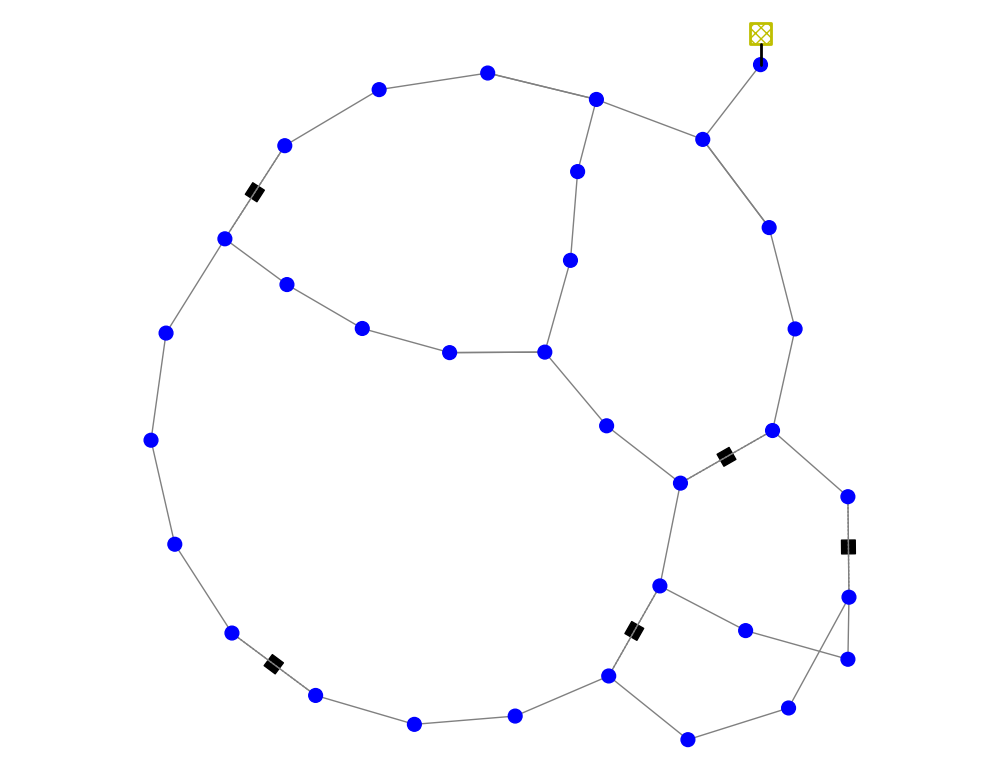

In [25]:
import matplotlib.pyplot as plt
import pandapower.plotting as plot

# 可视化电网
plot.simple_plot(net)
plt.show()

In [26]:
'''# 将 res_bus 转换为 DataFrame
res_bus_df = pd.DataFrame(net.res_bus)

# 将 DataFrame 写入 CSV 文件
res_bus_df.to_csv('res_bus_data.csv', index=False)

print("res_bus 数据已成功写入 CSV 文件！")
'''

'# 将 res_bus 转换为 DataFrame\nres_bus_df = pd.DataFrame(net.res_bus)\n\n# 将 DataFrame 写入 CSV 文件\nres_bus_df.to_csv(\'res_bus_data.csv\', index=False)\n\nprint("res_bus 数据已成功写入 CSV 文件！")\n'

In [27]:
new_lines = []
for line in lines:
    # 生成随机值
    random_value_3 = random.uniform(0.2, 1.1)
    random_value_4 = random.uniform(0.2, 1.1)
    
    # 创建新的元组，替换第3列和第4列
    new_line = (line[0], line[1], random_value_3, random_value_4)
    new_lines.append(new_line)

# 打印新的线路数据
for line in new_lines:
    print(line)

(0, 1, 0.6817418965932094, 0.5223738313519826)
(1, 2, 0.862761733649215, 1.055556612149186)
(2, 3, 1.0680516926788077, 0.719135498312661)
(3, 4, 0.5686289274501177, 0.7421737901556407)
(4, 5, 0.7379483916347074, 0.6831281143665897)
(5, 6, 0.974423909850942, 0.7082356736173414)
(6, 7, 0.28457151067612707, 1.0711905599560436)
(7, 8, 0.8319044395483008, 0.9565697025524171)
(8, 9, 1.0192048578844963, 0.6137601952322587)
(9, 10, 0.4464802993220961, 0.3511847829949818)
(10, 11, 0.7379938035373457, 0.9709097866113445)
(11, 12, 0.3193536671392585, 0.8753883300929579)
(12, 13, 0.20763035980197195, 0.343700319729686)
(13, 14, 0.8641362320118076, 0.7900614514902291)
(14, 15, 0.8876957449740426, 1.0548328691949669)
(15, 16, 0.30097262775846967, 0.4798391429215294)
(16, 17, 0.531191819189351, 0.9257172687962465)
(1, 18, 1.055106296032036, 0.7192032222950766)
(18, 19, 0.2363087485367864, 0.8982093919658722)
(19, 20, 0.32484026894035173, 0.20920504462961806)
(20, 21, 0.6387315972384184, 0.66558859012